# Column definitions:

- id: An unique ID identifying this Game in RAWG Database
- slug: An unique slug identifying this Game in RAWG Database
- name: Name of the game
- metacritic: Rating of the game on Metacritic
- released: The date the game was released
- tba: To be announced state
- updated: The date the game was last updated
- website: Game Website
- rating: Rating rated by RAWG user
- rating_top: Maximum rating
- playtime: Hours needed to complete the game
- achievements_count: Number of achievements in game
- ratings_count: Number of RAWG users who rated the game
- suggestions_count: Number of RAWG users who suggested the game
- game_series_count: Number of games in the series
- reviews_count: Number of RAWG users who reviewed the game
- platforms: Platforms game was released on. Separated by ||
- developers: Game developers. Separated by ||
- genres: Game genres. Separated by ||
- publishers: Game publishers. Separated by ||
- esrb_rating: ESRB ratings
- added_status_yet: Number of RAWG users had the game as "Not played"
- added_status_owned: Number of RAWG users had the game as "Owned"
- added_status_beaten: Number of RAWG users had the game as "Completed"
- added_status_toplay: Number of RAWG users had the game as "To play"
- added_status_dropped: Number of RAWG users had the game as "Played but not beaten"
- added_status_playing: Number of RAWG users had the game as "Playing"


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go

pd.options.display.max_columns = None




In [2]:
df = pd.read_parquet('df_igdb.parquet')

# Data Exploration


In [3]:
'''
# import pour ydata_profiling
import ydata_profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

# creation d'un rapport exploratoire de notre dataframe

profile = ProfileReport(df, title="Analyse Générale",html={'style': {'full_width': True}})

# Affichage de notre rapport exploratoire :

profile.to_notebook_iframe()
'''

'\n# import pour ydata_profiling\nimport ydata_profiling\nfrom ydata_profiling import ProfileReport\nfrom ydata_profiling.utils.cache import cache_file\n\n# creation d\'un rapport exploratoire de notre dataframe\n\nprofile = ProfileReport(df, title="Analyse Générale",html={\'style\': {\'full_width\': True}})\n\n# Affichage de notre rapport exploratoire :\n\nprofile.to_notebook_iframe()\n'

In [48]:
df['playtime'].unique()

array([6.900e+01, 5.000e+01, 1.100e+01, 4.400e+01, 5.900e+01, 9.000e+00,
       4.000e+00, 1.200e+01, 1.000e+01, 7.000e+00, 2.000e+01, 3.000e+00,
       4.500e+01, 1.800e+01, 1.300e+01, 2.800e+01, 8.000e+00, 1.500e+01,
       1.000e+00, 1.400e+01, 2.000e+00, 5.000e+00, 6.000e+00, 1.600e+01,
       0.000e+00, 3.000e+01, 2.200e+01, 1.900e+01, 3.410e+02, 8.400e+01,
       2.400e+01, 2.900e+01, 7.300e+01, 1.140e+02, 5.700e+01, 4.600e+01,
       7.500e+01, 2.600e+01, 6.300e+01, 2.500e+01, 3.670e+02, 4.100e+01,
       3.500e+01, 3.300e+01, 2.100e+01, 8.000e+01, 1.700e+01, 7.000e+01,
       2.170e+02, 5.800e+01, 1.040e+02, 1.560e+02, 1.130e+02, 4.700e+01,
       2.110e+02, 5.500e+01, 5.100e+01, 8.100e+01, 2.300e+01, 4.300e+01,
       3.600e+01, 4.200e+01, 4.900e+01, 3.200e+01, 1.320e+02, 2.700e+01,
       3.400e+01, 5.600e+01, 7.600e+01, 6.100e+01, 2.390e+02, 8.500e+01,
       1.530e+02, 1.400e+02, 4.800e+01, 9.500e+01, 3.700e+01, 6.200e+01,
       5.200e+01, 4.000e+01, 9.100e+01, 2.260e+02, 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349229 entries, 0 to 349228
Data columns (total 88 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     349229 non-null  int64         
 1   name                   349229 non-null  object        
 2   metacritic             4655 non-null    float64       
 3   released               349229 non-null  datetime64[ns]
 4   website                56512 non-null   object        
 5   rating                 349229 non-null  float64       
 6   playtime               349229 non-null  float64       
 7   ratings_count          349229 non-null  float64       
 8   suggestions_count      349229 non-null  float64       
 9   game_series_count      349229 non-null  float64       
 10  reviews_count          349229 non-null  float64       
 11  platforms              349229 non-null  object        
 12  developers             346928 non-null  obje

In [5]:
df.head(10)

,id,name,metacritic,released,website,rating,playtime,ratings_count,suggestions_count,game_series_count,reviews_count,platforms,developers,genres,esrb_rating,year,decennie,Card,RPG,Shooter,Strategy,Action,Sports,Massively Multiplayer,Platformer,Puzzle,Educational,Family,Casual,Indie,Simulation,Arcade,Fighting,Racing,Board Games,Adventure,,PlayStation 5,Commodore / Amiga,SEGA Saturn,SNES,Dreamcast,Nintendo Switch,Atari 5200,Xbox Series S/X,3DO,Atari 7800,SEGA CD,Game Boy Advance,Nintendo 64,Xbox,Atari Lynx,Nintendo DS,Xbox 360,Atari Flashback,Neo Geo,Apple II,Nintendo 3DS,NES,PS Vita,Game Boy,Linux,iOS,Genesis,PC,Jaguar,SEGA 32X,Atari ST,Wii U,Web,PlayStation 3,Game Boy Color,Game Gear,Classic Macintosh,PSP,PlayStation 2,macOS,Atari 8-bit,PlayStation 4,Android,Wii,Atari XEGS,PlayStation,SEGA Master System,GameCube,Xbox One,Atari 2600,Nintendo DSi
0,3498,Grand Theft Auto V,97.0,2013-09-17,http://www.rockstargames.com/V/,4.48,69.0,4289.0,426.0,9.0,4334.0,PC||Xbox Series S/X||PlayStation 5||PlayStatio...,Rockstar North,Action,Mature,2013.0,2010.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,3328,The Witcher 3: Wild Hunt,92.0,2015-05-18,https://thewitcher.com/en/witcher3,4.67,50.0,3939.0,688.0,6.0,3996.0,PC||Xbox One||Nintendo Switch||PlayStation 4,CD PROJEKT RED,Action||Adventure||RPG,Mature,2015.0,2010.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,4200,Portal 2,95.0,2011-04-18,http://www.thinkwithportals.com/,4.61,11.0,3613.0,589.0,2.0,3645.0,Xbox One||PlayStation 3||PC||Xbox 360||Linux||...,Valve Software,Shooter||Puzzle,Everyone 10+,2011.0,2010.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,5286,Tomb Raider (2013),86.0,2013-03-05,http://www.tombraider.com,4.06,11.0,2527.0,673.0,17.0,2542.0,PC||PlayStation 4||PlayStation 3||Xbox 360||Xb...,Crystal Dynamics,Action||Adventure,Mature,2013.0,2010.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,5679,The Elder Scrolls V: Skyrim,94.0,2011-11-11,http://elderscrolls.com/,4.42,44.0,3033.0,625.0,8.0,3053.0,PC||PlayStation 3||Xbox 360||Nintendo Switch,Bethesda Softworks||Bethesda Game Studios,Action||RPG,Mature,2011.0,2010.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4291,Counter-Strike: Global Offensive,81.0,2012-08-21,http://blog.counter-strike.net/,3.57,59.0,2089.0,608.0,5.0,2104.0,PC||Xbox 360||PlayStation 3,Valve Software||Hidden Path Entertainment,Action||Shooter,Mature,2012.0,2010.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,12020,Left 4 Dead 2,89.0,2009-11-17,http://www.l4d.com,4.10,9.0,2107.0,610.0,2.0,2116.0,PC||Xbox 360,Valve Software||Turtle Rock Studios,Action||Shooter,Mature,2009.0,2000.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,13536,Portal,90.0,2007-10-09,http://www.whatistheorangebox.com/,4.52,4.0,3050.0,329.0,2.0,3069.0,macOS||Android||PC||Linux||PlayStation 3||Xbox...,Valve Software||NVIDIA Lightspeed Studios,Action||Adventure||Puzzle,Teen,2007.0,2000.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8,4062,BioShock Infinite,94.0,2013-03-26,http://www.bioshockinfinite.com/,4.39,12.0,2769.0,599.0,4.0,2790.0,PC||Nintendo Switch||Linux||PlayStation 3||Pla...,Aspyr Media||2K Australia||Irrational Games,Action||Shooter,Mature,2013.0,2010.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [6]:
df.shape

(349229, 88)

In [7]:
df.columns

Index(['id', 'name', 'metacritic', 'released', 'website', 'rating', 'playtime',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'esrb_rating',
       'year', 'decennie', 'Card', 'RPG', 'Shooter', 'Strategy', 'Action',
       'Sports', 'Massively Multiplayer', 'Platformer', 'Puzzle',
       'Educational', 'Family', 'Casual', 'Indie', 'Simulation', 'Arcade',
       'Fighting', 'Racing', 'Board Games', 'Adventure', '', 'PlayStation 5',
       'Commodore / Amiga', 'SEGA Saturn', 'SNES', 'Dreamcast',
       'Nintendo Switch', 'Atari 5200', 'Xbox Series S/X', '3DO', 'Atari 7800',
       'SEGA CD', 'Game Boy Advance', 'Nintendo 64', 'Xbox', 'Atari Lynx',
       'Nintendo DS', 'Xbox 360', 'Atari Flashback', 'Neo Geo', 'Apple II',
       'Nintendo 3DS', 'NES', 'PS Vita', 'Game Boy', 'Linux', 'iOS', 'Genesis',
       'PC', 'Jaguar', 'SEGA 32X', 'Atari ST', 'Wii U', 'Web', 'PlayStation 3',
       'Game Boy Color', 'Gam

In [8]:
df = df.drop([''], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349229 entries, 0 to 349228
Data columns (total 87 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     349229 non-null  int64         
 1   name                   349229 non-null  object        
 2   metacritic             4655 non-null    float64       
 3   released               349229 non-null  datetime64[ns]
 4   website                56512 non-null   object        
 5   rating                 349229 non-null  float64       
 6   playtime               349229 non-null  float64       
 7   ratings_count          349229 non-null  float64       
 8   suggestions_count      349229 non-null  float64       
 9   game_series_count      349229 non-null  float64       
 10  reviews_count          349229 non-null  float64       
 11  platforms              349229 non-null  object        
 12  developers             346928 non-null  obje

## Visualisations :

In [65]:

genres = ['Card', 'RPG', 'Shooter', 'Strategy', 'Action',
       'Sports', 'Massively Multiplayer', 'Platformer', 'Puzzle',
       'Educational', 'Family', 'Casual', 'Indie', 'Simulation', 'Arcade',
       'Fighting', 'Racing', 'Board Games', 'Adventure']
df2 = df[df['playtime'] != 0]

average_playtime_by_genre = {}
for genre in genres:
    # On sélectionne les lignes où le genre est présent (valeur == 1)
    genre_playtime = df2[df2[genre] == 1]['playtime']

    # Calculer la moyenne de playtime pour ce genre
    average_playtime_by_genre[genre] = genre_playtime.mean()

df_avg_playtime = pd.DataFrame(list(average_playtime_by_genre.items()), columns=['Genre', 'Average Playtime'])




In [66]:
df_avg_playtime

,Genre,Average Playtime
0,Card,6.298246
1,RPG,5.954325
2,Shooter,5.188534
3,Strategy,4.333184
4,Action,3.823183
5,Sports,6.567468
6,Massively Multiplayer,6.667590
7,Platformer,4.503817
8,Puzzle,4.654545
9,Educational,4.353741


In [67]:
fig_hour = px.bar(df_avg_playtime, x='Genre', y='Average Playtime', 
           title='Moyenne durée pour finir un jeu (en heures)',
           text='Average Playtime',
           color='Average Playtime',
           color_continuous_scale='bugn',
           labels={'Average Playtime':'Durée'}
           )
fig_hour.update_traces(texttemplate='%{text:.2f}', textposition='inside',
                       )

In [12]:
# Liste des plateformes
platforms = ['PlayStation 5', 'Commodore / Amiga', 'SEGA Saturn', 'SNES', 'Dreamcast',
             'Nintendo Switch', 'Atari 5200', 'Xbox Series S/X', '3DO', 'Atari 7800',
             'SEGA CD', 'Game Boy Advance', 'Nintendo 64', 'Xbox', 'Atari Lynx',
             'Nintendo DS', 'Xbox 360', 'Atari Flashback', 'Neo Geo', 'Apple II',
             'Nintendo 3DS', 'NES', 'PS Vita', 'Game Boy', 'Linux', 'iOS', 'Genesis',
             'PC', 'Jaguar', 'SEGA 32X', 'Atari ST', 'Wii U', 'Web', 'PlayStation 3',
             'Game Boy Color', 'Game Gear', 'Classic Macintosh', 'PSP', 'PlayStation 2',
             'macOS', 'Atari 8-bit', 'PlayStation 4', 'Android', 'Wii', 'Atari XEGS',
             'PlayStation', 'SEGA Master System', 'GameCube', 'Xbox One', 'Atari 2600',
             'Nintendo DSi']

# Dictionnaire pour stocker la popularité par décennie pour chaque plateforme
popularity_platform_by_decade = {}

for platform in platforms:
    # Sélectionner les lignes où la plateforme est présente (valeur == 1)
    platform_pop = df[df[platform] == 1]['year']
    
    # Compter les occurrences (nombre de jeux) par décennie, divisé par 1000
    popularity_platform_by_decade[platform] = platform_pop.value_counts().sort_index() / 1000

# Transformer en DataFrame
df_pop_platform = pd.DataFrame(popularity_platform_by_decade).fillna(0)

# Réinitialiser l'index pour avoir les décennies comme colonne
df_pop_platform = df_pop_platform.reset_index().rename(columns={'index': 'Year'})

# Visualisation en barres empilées
fig_pop = px.bar(df_pop_platform, x='year', y=platforms,
                 title='Popularité au fil des décennies par Plateforme (en milliers) depuis 2000',
                 labels={'value': 'Nombre de jeux (en milliers)', 'year': 'Année'},
                 text_auto=True)

# Modifier le type de graphique pour avoir des barres empilées
fig_pop.update_layout(barmode='stack',xaxis=dict(range=[2000, 2020])
)

# Afficher le graphique
fig_pop.show()


In [13]:
df_limited = df.head(15).sort_values(by='rating', ascending=False).head(15)

fig_15 = px.bar(df_limited,x='name',y='rating',text='rating',title ='Top 15 des jeux par note',
                labels={'name':'Nom du jeu','rating':'Note'},color='rating',color_continuous_scale='bugn')
fig_15.show()

In [14]:
# Liste des plateformes
platforms = ['PlayStation 5', 'Commodore / Amiga', 'SEGA Saturn', 'SNES', 'Dreamcast',
             'Nintendo Switch', 'Atari 5200', 'Xbox Series S/X', '3DO', 'Atari 7800',
             'SEGA CD', 'Game Boy Advance', 'Nintendo 64', 'Xbox', 'Atari Lynx',
             'Nintendo DS', 'Xbox 360', 'Atari Flashback', 'Neo Geo', 'Apple II',
             'Nintendo 3DS', 'NES', 'PS Vita', 'Game Boy', 'Linux', 'iOS', 'Genesis',
             'PC', 'Jaguar', 'SEGA 32X', 'Atari ST', 'Wii U', 'Web', 'PlayStation 3',
             'Game Boy Color', 'Game Gear', 'Classic Macintosh', 'PSP', 'PlayStation 2',
             'macOS', 'Atari 8-bit', 'PlayStation 4', 'Android', 'Wii', 'Atari XEGS',
             'PlayStation', 'SEGA Master System', 'GameCube', 'Xbox One', 'Atari 2600',
             'Nintendo DSi']

# Fonction pour insérer un saut de ligne après chaque 25 caractères
def insert_line_breaks(text, max_length=25):
    return '<br>'.join([text[i:i + max_length] for i in range(0, len(text), max_length)])

# DataFrame pour stocker le top 15 jeux par plateforme
df_top_platforms = pd.DataFrame()

for platform in platforms:
    # Filtrer les jeux présents sur la plateforme (valeur == 1)
    df_platform = df[df[platform] == 1]
    
    # Trier par la note et prendre les 15 meilleurs jeux
    df_top = df_platform.sort_values(by='rating', ascending=False).head(15)
    
    # Ajouter une colonne pour savoir à quelle plateforme le jeu appartient
    df_top['platform'] = platform
    
    # Ajouter les résultats au DataFrame final
    df_top_platforms = pd.concat([df_top_platforms, df_top])

# Insérer des sauts de ligne dans les titres de jeux pour les afficher sur deux lignes
df_top_platforms['name'] = df_top_platforms['name'].apply(lambda x: insert_line_breaks(x, max_length=17))

# Création du subplot
fig_top_15 = make_subplots(rows=len(platforms), cols=1, subplot_titles=platforms)

for idx, platform in enumerate(platforms):
    platform_games = df_top_platforms[df_top_platforms['platform'] == platform]
    
    if not platform_games.empty:
        # Générer le graphique à barres pour cette plateforme
        fig_top_15.add_trace(go.Bar(
            x=platform_games['name'],
            y=platform_games['rating'],
            text=platform_games['rating'],
            marker=dict(
                color=platform_games['rating'],
                colorscale='oxy',  
                cmin=3,  # Point minimal
                cmax=platform_games['rating'].max()
            ),
            showlegend=False  # Ne pas afficher la légende
        ), row=idx + 1, col=1)

# Ajuster l'angle et la taille des étiquettes de l'axe des x
fig_top_15.update_xaxes(tickangle=45, tickfont=dict(size=8), tickmode='array')

# Espacer les sous-graphes
fig_top_15.update_layout(height=9000, title_text="Top 15 des jeux par plateforme", 
                  xaxis_title="Jeux", yaxis_title="Note", showlegend=False)

# Afficher la figure
fig_top_15.show()


In [15]:
# Liste des plateformes SELECTION 10 ANS
platforms = [
    'PlayStation 5',
    'Nintendo Switch',
    'Xbox Series S/X',
    'PC',
    'macOS',
    'Linux',
    'iOS',
    'Android'
]


# Fonction pour insérer un saut de ligne après chaque 25 caractères
def insert_line_breaks(text, max_length=25):
    return '<br>'.join([text[i:i + max_length] for i in range(0, len(text), max_length)])

# DataFrame pour stocker le top 15 jeux par plateforme
df_top_platforms = pd.DataFrame()

for platform in platforms:
    # Filtrer les jeux présents sur la plateforme (valeur == 1)
    df_platform = df[df[platform] == 1]

    # Trier par la note et prendre les 15 meilleurs jeux
    df_top = df_platform.sort_values(by='rating', ascending=False).head(10)

    # Ajouter une colonne pour savoir à quelle plateforme le jeu appartient
    df_top['platform'] = platform

    # Ajouter les résultats au DataFrame final
    df_top_platforms = pd.concat([df_top_platforms, df_top])

# Insérer des sauts de ligne dans les titres de jeux pour les afficher sur deux lignes
#df_top_platforms['name'] = df_top_platforms['name'].apply(lambda x: insert_line_breaks(x, max_length=30))

# Calculer le nombre de lignes nécessaires pour afficher les graphiques sur 3 colonnes
num_rows = (len(platforms) + 2) // 3  # Arrondir au nombre de lignes nécessaires

# Création du subplot
fig_top_10 = make_subplots(rows=num_rows, cols=3, subplot_titles=platforms)

for idx, platform in enumerate(platforms):
    row = (idx // 3) + 1
    col = (idx % 3) + 1
    platform_games = df_top_platforms[df_top_platforms['platform'] == platform]

    if not platform_games.empty:
        # Générer le graphique à barres pour cette plateforme
        fig_top_10.add_trace(go.Bar(
            x=platform_games['name'],
            y=platform_games['rating'],
            text=platform_games['rating'],
            textfont=dict(size=15),
            marker=dict(
                color=platform_games['rating'],
                colorscale='viridis',
                cmin=3,  # Point minimal
                cmax=platform_games['rating'].max()
            ),
            showlegend=False  # Ne pas afficher la légende
        ), row=row, col=col)

# Ajuster l'angle et la taille des étiquettes de l'axe des x
fig_top_10.update_xaxes(tickangle=45, tickfont=dict(size=7.5), tickmode='array')

# Espacer les sous-graphes
fig_top_10.update_layout(height=1000, 
                 title_text="Top 10 des jeux par plateforme depuis 10 ans",
                  xaxis_title="Jeux", yaxis_title="Note", showlegend=False,
                  uniformtext_minsize=5,
                  uniformtext_mode='show',
                  margin=dict(l=50, r=50, t=50, b=50),  # Ajuster les marges 
                  #bargap=0.4,  # Espace entre les barres d'un même groupe
                  bargroupgap=0.3  # Espace entre les groupes de barres
                  )

# Afficher la figure
fig_top_10.show()

In [44]:

# Liste des plateformes SELECTION 10 ANS VIOLIN
platforms = [
    'PlayStation 5',
    'Nintendo Switch',
    'Xbox Series S/X',
    'PC',
    'macOS',
    'Linux',
    'iOS',
    'Android'
]

# DataFrame pour stocker les notes par plateforme
df_ratings = pd.DataFrame()

for platform in platforms:
    # Filtrer les jeux présents sur la plateforme (valeur == 1)
    df_platform = df[df[platform] == 1]

    # Ajouter les notes et la plateforme à un DataFrame
    df_ratings = pd.concat([df_ratings, df_platform[['rating']].assign(platform=platform)])

# Supprimer les lignes avec des notes à 0 ou NaN
df_ratings = df_ratings[df_ratings['rating'] != 0]
df_ratings = df_ratings.dropna(subset=['rating'])

fig_violin = px.violin(df_ratings, x='platform', y='rating', box=True,  # Afficher la boîte à moustaches
                 title='Distribution des notes par plateforme',
                 labels={'platform': 'Plateforme', 'rating': 'Note'},
                 category_orders={'platform': platforms},
                 color="platform"
                 )  # Définir l'ordre des plateformes

fig_violin.update_layout(xaxis_title='Plateforme', yaxis_title='Note')
fig_violin.show()


In [16]:
# Définir manuellement les genres à analyser
selected_genres = ['Action', 'Adventure', 'RPG', 'Puzzle', 'Shooter', 'Platformer',
                   'Indie', 'Massively Multiplayer', 'Sports', 'Racing', 'Casual',
                   'Strategy', 'Simulation', 'Family', 'Educational', 'Arcade', 'Fighting',
                   'Board Games', 'Card']

# Conversion de la colonne 'year' en datetime
df['year'] = pd.to_datetime(df['year'], errors='coerce')
df['released_year'] = df['released'].dt.year 

# Filtrer les genres qui sont dans les colonnes du DataFrame
valid_genres = [genre for genre in selected_genres if genre in df.columns]

# Grouper par année et sommer les genres
genre_counts = df.groupby("released_year")[valid_genres].sum()

# Transformer les données pour Plotly
genre_counts = genre_counts.reset_index().melt(id_vars="released_year", var_name="Genres", value_name="Count")

fig_evolution = px.area(genre_counts, x='released_year', y='Count', color='Genres', 
                title='Nombre de jeux par genre et année',
                labels = {"Count" :"Nombre", "released_year": "Année"})
                
fig_evolution.update_layout(
    xaxis=dict(
        range=[2000, 2020]
    )
)

fig_evolution.show()




In [17]:
# Créer un sélecteur à choix multiples pour les plateformes
platform_selector = widgets.SelectMultiple(
    options=df.columns.tolist()[-51:],  # Utilisez les dernières colonnes pour les plateformes
    value=df.columns.tolist()[-51:],
    description='Platforms',
    disabled=False
)

# Fonction pour mettre à jour le graphique
def update_graph(selected_platforms):
    if not selected_platforms:
        # Si aucune plateforme n'est sélectionnée, afficher un message ou un graphique vide
        fig = px.bar(title="Veuillez sélectionner au moins une plateforme.")
    else:
        # Vérifier que les plateformes sélectionnées sont présentes dans les colonnes du DataFrame
        valid_platforms = [platform for platform in selected_platforms if platform in df.columns]

        if not valid_platforms:
            # Si aucune plateforme valide n'est sélectionnée, afficher un message ou un graphique vide
            fig = px.bar(title="Aucune plateforme valide sélectionnée.")
        else:
            # Calculer le nombre total de jeux pour chaque plateforme sélectionnée
            platform_counts = df.groupby("year")[valid_platforms].sum()

            # Transformer les données pour le graphique
            platform_counts = platform_counts.reset_index().melt(id_vars="year", var_name="Platforms", value_name="Count")

            # Créer le bar plot
            fig = px.bar(
                platform_counts,
                x="year",
                y="Count",
                color="Platforms",
                barmode="group",
                labels={
                    'year': 'Year',
                    'Count': 'Number of Games',
                    'Platforms': 'Platforms'
                },
                title="Nombre de Jeux par Plateforme et Année"
            )

    fig.show()

# Affichage du sélecteur et mise à jour du graphique
interactive_plot = widgets.interactive(update_graph, selected_platforms=platform_selector)
display(interactive_plot)


interactive(children=(SelectMultiple(description='Platforms', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…

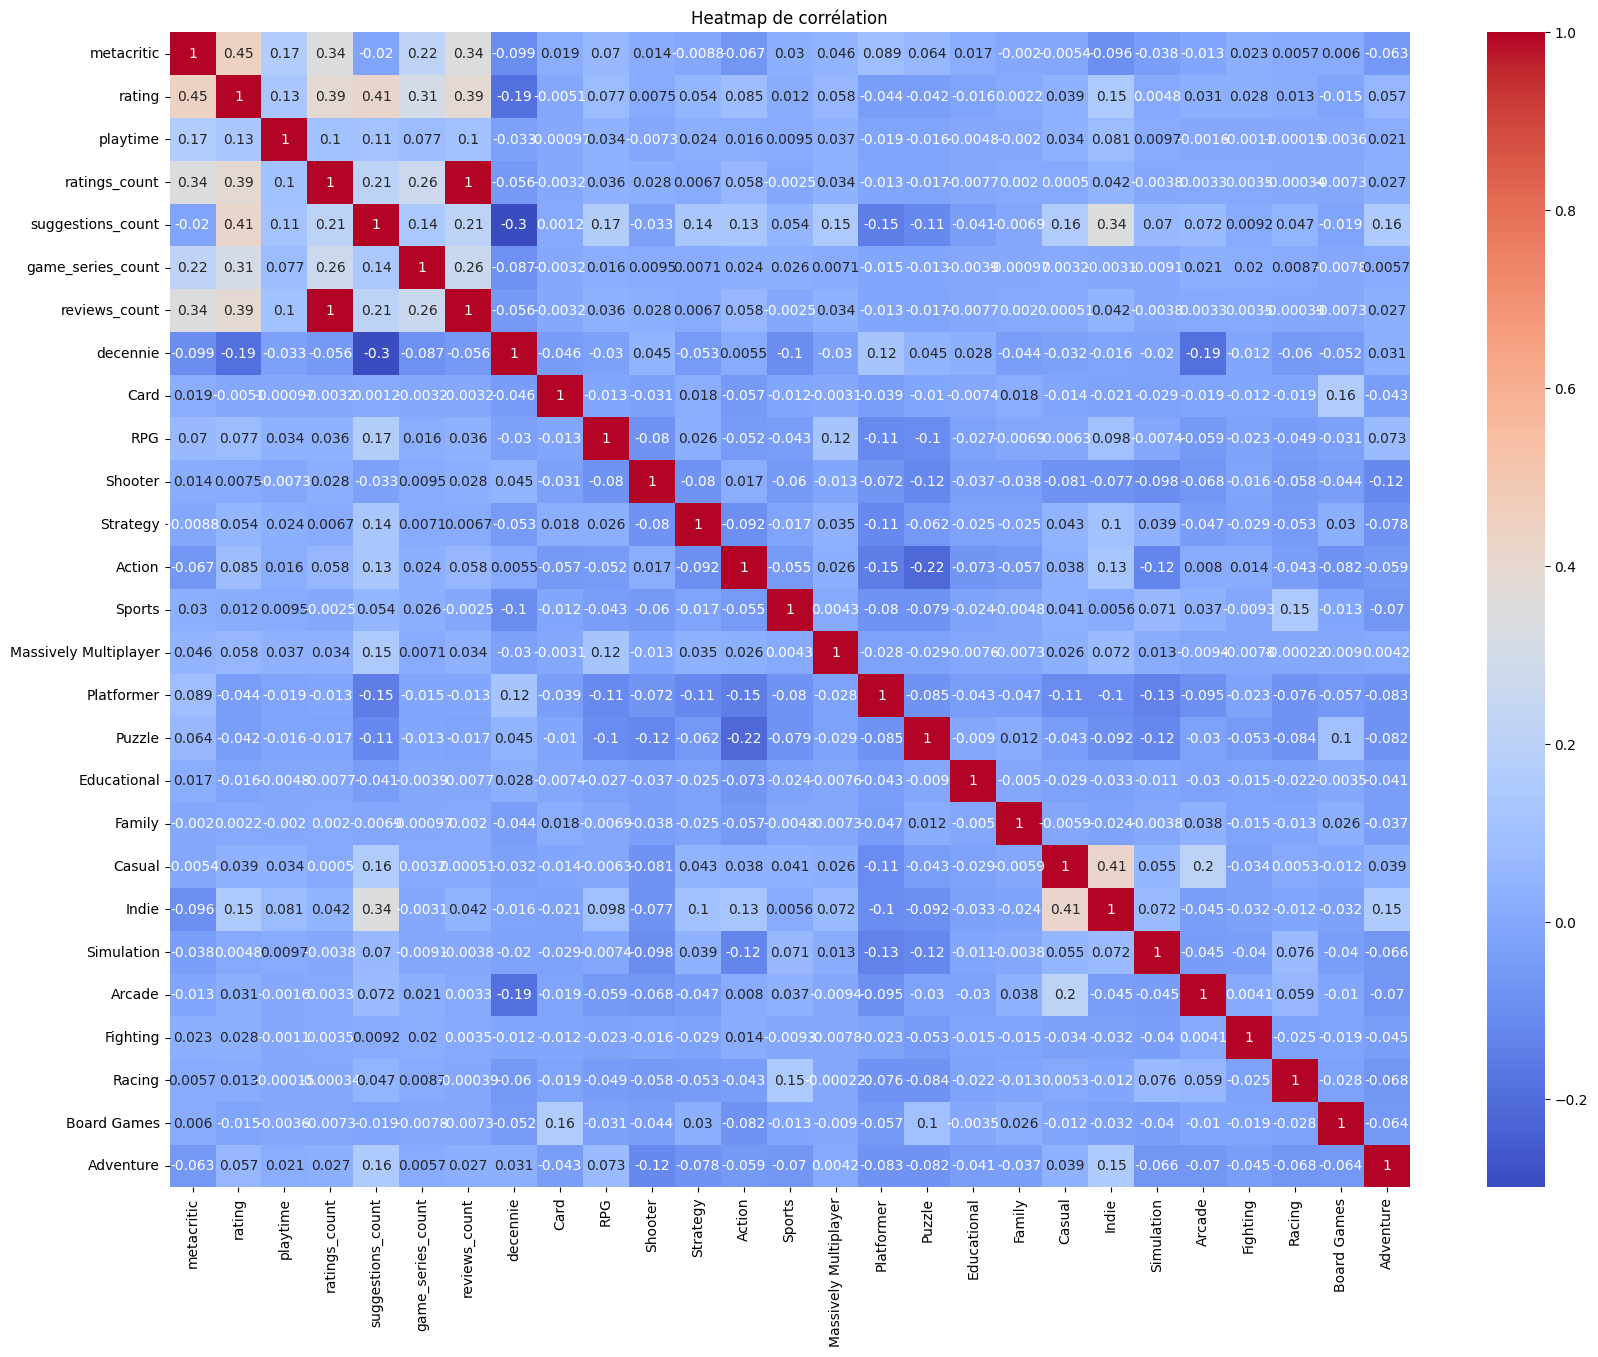

In [18]:
# Select columns with numeric values.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df = numeric_df.drop(['id','Apple II',
       'Game Boy Advance', 'Commodore / Amiga', 'SNES', 'PlayStation 4', 'Web',
       'Jaguar', 'PlayStation 2', 'PC', 'PlayStation 5', 'SEGA Master System',
       'Nintendo DSi', 'Nintendo DS', 'GameCube', 'NES', 'Classic Macintosh',
       '3DO', 'Neo Geo', 'Atari 8-bit', 'Atari Lynx', 'SEGA CD', 'Xbox 360',
       'Linux', 'Xbox Series S/X', 'Dreamcast', 'Game Gear', 'Nintendo 64',
       'Atari 2600', 'Game Boy', 'Android', 'Atari 5200', 'Atari XEGS',
       'macOS', 'Atari Flashback', 'Wii', 'SEGA Saturn', 'Atari 7800',
       'Nintendo 3DS', 'Genesis', 'PS Vita', 'PlayStation 3', 'PlayStation',
       'Nintendo Switch', 'Atari ST', 'SEGA 32X', 'Wii U', 'Xbox One', 'PSP',
       'iOS', 'Game Boy Color', 'Xbox'],axis=1)

plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e8983c89-035b-4445-844a-c2e0c9dbc03e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>